In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Potohar region.csv' , skiprows=14)

In [3]:
df.head()

,YEAR,DOY,PRECTOTCORR,T2M,WS2M,RH2M,T2M_MAX,T2M_MIN
0,2008,1,0.00,10.78,1.45,17.12,18.92,6.19
1,2008,2,0.00,9.67,1.34,18.98,18.27,5.47
2,2008,3,0.00,9.07,1.40,21.36,18.49,3.09
3,2008,4,0.03,11.20,1.48,28.41,17.00,7.08
4,2008,5,6.95,10.65,1.15,54.53,14.82,8.13


In [4]:
df.shape

(5844, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5844 entries, 0 to 5843
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         5844 non-null   int64  
 1   DOY          5844 non-null   int64  
 2   PRECTOTCORR  5844 non-null   float64
 3   T2M          5844 non-null   float64
 4   WS2M         5844 non-null   float64
 5   RH2M         5844 non-null   float64
 6   T2M_MAX      5844 non-null   float64
 7   T2M_MIN      5844 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 365.4 KB


In [6]:
df.describe()

,YEAR,DOY,PRECTOTCORR,T2M,WS2M,RH2M,T2M_MAX,T2M_MIN
count,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000
mean,2015.498973,183.125257,3.400424,22.352589,1.484837,52.060192,28.869196,16.774740
std,4.610241,105.447665,14.247929,7.916071,0.436429,17.505823,7.613900,7.606198
min,2008.000000,1.000000,0.000000,4.830000,0.490000,7.900000,7.820000,-2.210000
25%,2011.750000,92.000000,0.000000,15.347500,1.170000,39.760000,22.660000,10.117500
50%,2015.500000,183.000000,0.020000,23.440000,1.420000,51.895000,29.890000,17.150000
75%,2019.250000,274.000000,1.830000,28.910000,1.720000,65.685000,34.310000,23.800000
max,2023.000000,366.000000,450.570000,39.510000,5.080000,94.700000,47.380000,32.340000


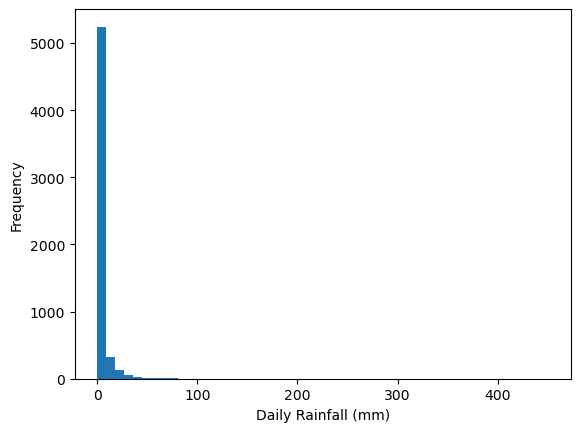

In [7]:
plt.hist(df['PRECTOTCORR'], bins=50)
plt.xlabel('Daily Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

In [8]:
df.isnull().sum()

YEAR           0
DOY            0
PRECTOTCORR    0
T2M            0
WS2M           0
RH2M           0
T2M_MAX        0
T2M_MIN        0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

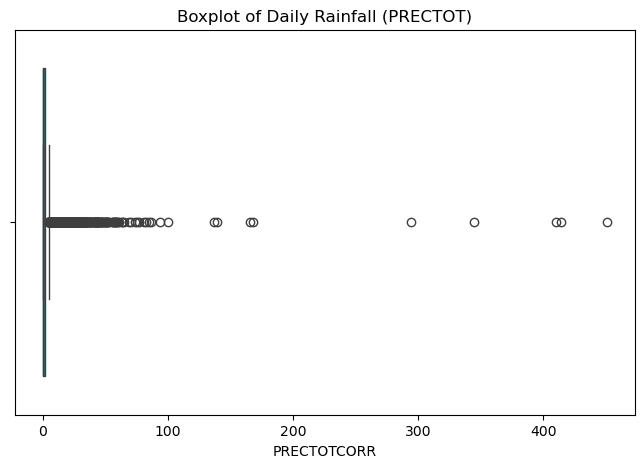

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['PRECTOTCORR'])
plt.title("Boxplot of Daily Rainfall (PRECTOT)")
plt.show()

In [11]:
df['Heavy_Rain'] = (df['PRECTOTCORR'] > 45).astype(int)

In [12]:
df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + df['DOY'].astype(str), format='%Y%j')

In [13]:
df.head()

,YEAR,DOY,PRECTOTCORR,T2M,WS2M,RH2M,T2M_MAX,T2M_MIN,Heavy_Rain,DATE
0,2008,1,0.00,10.78,1.45,17.12,18.92,6.19,0,2008-01-01
1,2008,2,0.00,9.67,1.34,18.98,18.27,5.47,0,2008-01-02
2,2008,3,0.00,9.07,1.40,21.36,18.49,3.09,0,2008-01-03
3,2008,4,0.03,11.20,1.48,28.41,17.00,7.08,0,2008-01-04
4,2008,5,6.95,10.65,1.15,54.53,14.82,8.13,0,2008-01-05


In [14]:
df['Month'] = df['DATE'].dt.month
df['Day'] = df['DATE'].dt.day
df['Year'] = df['DATE'].dt.year  # Overwrites if needed

In [15]:
df.head()

,YEAR,DOY,PRECTOTCORR,T2M,WS2M,RH2M,T2M_MAX,T2M_MIN,Heavy_Rain,DATE,Month,Day,Year
0,2008,1,0.00,10.78,1.45,17.12,18.92,6.19,0,2008-01-01,1,1,2008
1,2008,2,0.00,9.67,1.34,18.98,18.27,5.47,0,2008-01-02,1,2,2008
2,2008,3,0.00,9.07,1.40,21.36,18.49,3.09,0,2008-01-03,1,3,2008
3,2008,4,0.03,11.20,1.48,28.41,17.00,7.08,0,2008-01-04,1,4,2008
4,2008,5,6.95,10.65,1.15,54.53,14.82,8.13,0,2008-01-05,1,5,2008


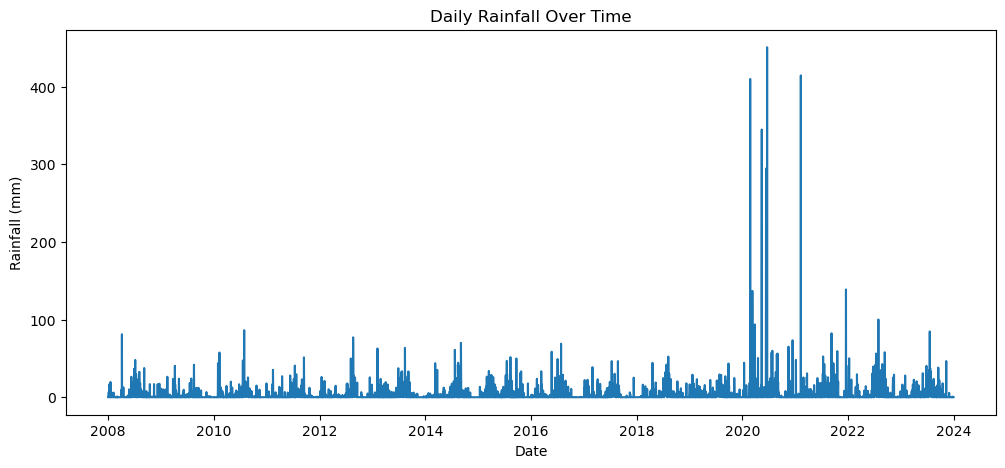

In [16]:
plt.figure(figsize=(12,5))
plt.plot(df['DATE'], df['PRECTOTCORR'])
plt.title('Daily Rainfall Over Time')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.show()

In [17]:
df.rename(columns={
    'PRECTOT': 'Rainfall_mm',
    'DOY':'Day_of_Year',
    'T2M': 'Avg_Temp_C',
    'T2M_MAX': 'Max_Temp_C',
    'T2M_MIN': 'Min_Temp_C',
    'RH2M': 'Humidity_pct',
    'WS2M': 'WindSpeed_mps'
}, inplace=True)

In [18]:
df.head()

,YEAR,Day_of_Year,PRECTOTCORR,Avg_Temp_C,WindSpeed_mps,Humidity_pct,Max_Temp_C,Min_Temp_C,Heavy_Rain,DATE,Month,Day,Year
0,2008,1,0.00,10.78,1.45,17.12,18.92,6.19,0,2008-01-01,1,1,2008
1,2008,2,0.00,9.67,1.34,18.98,18.27,5.47,0,2008-01-02,1,2,2008
2,2008,3,0.00,9.07,1.40,21.36,18.49,3.09,0,2008-01-03,1,3,2008
3,2008,4,0.03,11.20,1.48,28.41,17.00,7.08,0,2008-01-04,1,4,2008
4,2008,5,6.95,10.65,1.15,54.53,14.82,8.13,0,2008-01-05,1,5,2008


In [19]:
df.drop(df.columns[12],axis=1, inplace=True)

In [20]:
df.head()

,YEAR,Day_of_Year,PRECTOTCORR,Avg_Temp_C,WindSpeed_mps,Humidity_pct,Max_Temp_C,Min_Temp_C,Heavy_Rain,DATE,Month,Day
0,2008,1,0.00,10.78,1.45,17.12,18.92,6.19,0,2008-01-01,1,1
1,2008,2,0.00,9.67,1.34,18.98,18.27,5.47,0,2008-01-02,1,2
2,2008,3,0.00,9.07,1.40,21.36,18.49,3.09,0,2008-01-03,1,3
3,2008,4,0.03,11.20,1.48,28.41,17.00,7.08,0,2008-01-04,1,4
4,2008,5,6.95,10.65,1.15,54.53,14.82,8.13,0,2008-01-05,1,5


In [21]:
df['Heavy_Rain'].unique()

array([0, 1])

In [22]:
df['Heavy_Rain'].value_counts()

Heavy_Rain
0    5794
1      50
Name: count, dtype: int64

In [23]:
df.columns

Index(['YEAR', 'Day_of_Year', 'PRECTOTCORR', 'Avg_Temp_C', 'WindSpeed_mps',
       'Humidity_pct', 'Max_Temp_C', 'Min_Temp_C', 'Heavy_Rain', 'DATE',
       'Month', 'Day'],
      dtype='object')

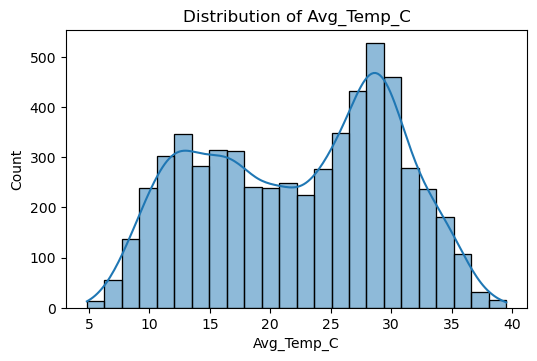

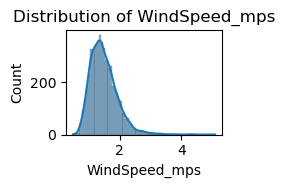

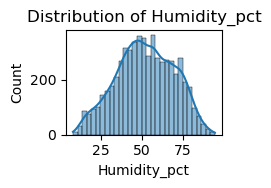

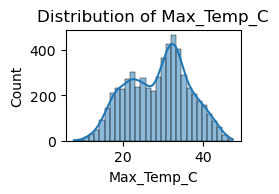

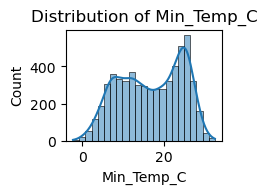

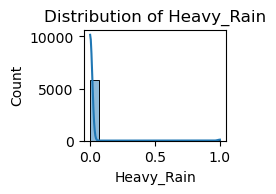

In [24]:
plt.figure(figsize=(15,10))

for i, column in enumerate(['Avg_Temp_C', 'WindSpeed_mps','Humidity_pct', 'Max_Temp_C', 'Min_Temp_C', 'Heavy_Rain'], 1):
    plt.subplot(3,3,i)
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")

    plt.tight_layout()
    plt.show()
    


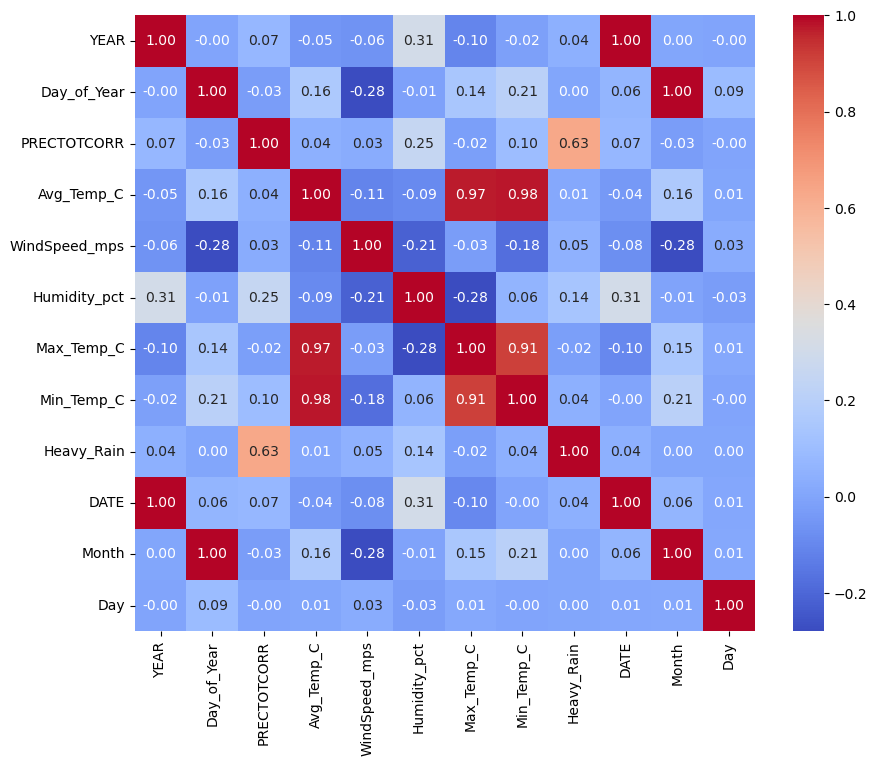

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [26]:
df.drop(columns=['YEAR', 'Day_of_Year', 'Month', 'Day'], inplace=True)

In [27]:
df.drop(columns=['Max_Temp_C','Min_Temp_C'], inplace=True)

In [28]:
df.head()

,PRECTOTCORR,Avg_Temp_C,WindSpeed_mps,Humidity_pct,Heavy_Rain,DATE
0,0.00,10.78,1.45,17.12,0,2008-01-01
1,0.00,9.67,1.34,18.98,0,2008-01-02
2,0.00,9.07,1.40,21.36,0,2008-01-03
3,0.03,11.20,1.48,28.41,0,2008-01-04
4,6.95,10.65,1.15,54.53,0,2008-01-05


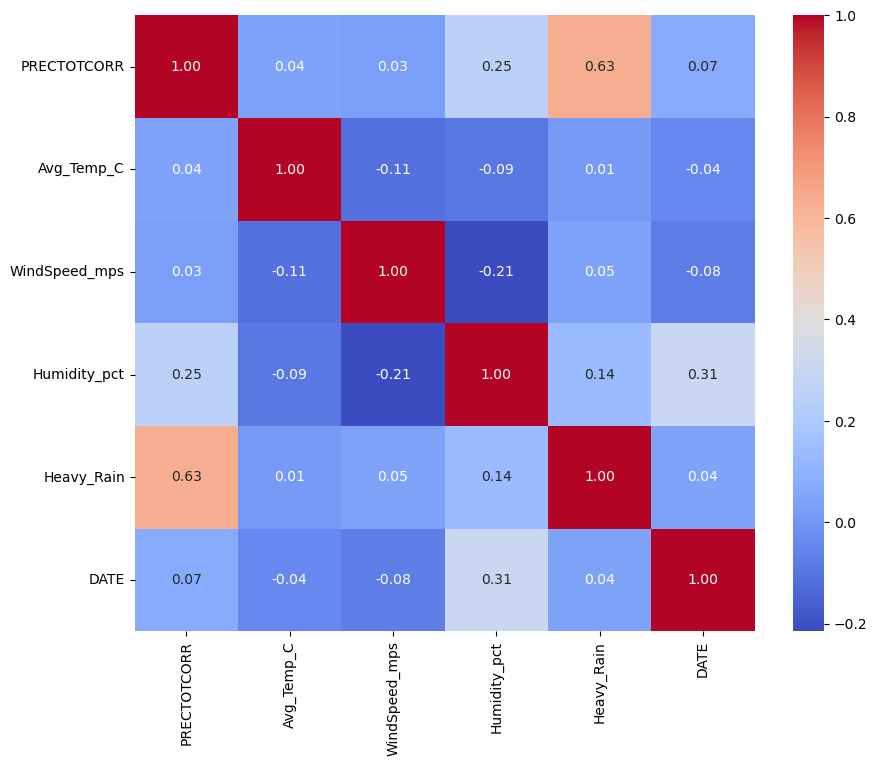

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [30]:
df['Month'] = df['DATE'].dt.month      # Rainfall patterns differ by month/season
df['DayOfYear'] = df['DATE'].dt.dayofyear  # Captures annual cycles

In [31]:
df['precip_roll_3'] = df['PRECTOTCORR'].shift(1).rolling(3).mean().fillna(0)
df['humidity_roll_3'] = df['Humidity_pct'].shift(1).rolling(3).mean().fillna(df['Humidity_pct'])

In [32]:
df.columns

Index(['PRECTOTCORR', 'Avg_Temp_C', 'WindSpeed_mps', 'Humidity_pct',
       'Heavy_Rain', 'DATE', 'Month', 'DayOfYear', 'precip_roll_3',
       'humidity_roll_3'],
      dtype='object')

In [33]:
# Modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Imbalance handling
from imblearn.over_sampling import SMOTE

In [34]:
# Drop DATE and target
X = df.drop(['PRECTOTCORR', 'Heavy_Rain', 'DATE'], axis=1)

# If PRECTOTCORR is directly used to define Heavy_Rain, drop it to avoid leakage
# X = df.drop(['Heavy_Rain', 'DATE', 'PRECTOTCORR'], axis=1)  

y = df['Heavy_Rain']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [36]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Check new balance
print(pd.Series(y_train_res).value_counts())

Heavy_Rain
0    4635
1    4635
Name: count, dtype: int64


C:\Users\PMLS\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [37]:
rf = RandomForestClassifier(
    n_estimators=500,
    class_weight='balanced',  # gives more weight to minority class
    random_state=42
)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42)

In [38]:
y_prob = rf.predict_proba(X_test)[:,1]
y_pred_adj = (y_prob > 0.1).astype(int)  # try 0.1–0.3
print(classification_report(y_test, y_pred_adj))


              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1159
           1       0.05      0.60      0.09        10

    accuracy                           0.89      1169
   macro avg       0.52      0.75      0.51      1169
weighted avg       0.99      0.89      0.93      1169



In [39]:
print("Classification Report:")
print(classification_report(y_test, y_pred_adj))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adj))

print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1159
           1       0.05      0.60      0.09        10

    accuracy                           0.89      1169
   macro avg       0.52      0.75      0.51      1169
weighted avg       0.99      0.89      0.93      1169

Confusion Matrix:
[[1035  124]
 [   4    6]]
ROC-AUC: 0.8873166522864537


In [40]:
import pickle
pickle.dump(rf, open('rf_flood_model_v2.pkl', 'wb'))

In [41]:
print(df['precip_roll_3'].describe())


count    5844.000000
mean        3.400424
std         9.225075
min         0.000000
25%         0.000000
50%         0.430000
75%         3.519167
max       170.976667
Name: precip_roll_3, dtype: float64
